# Import Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional # type: ignore
from tensorflow.keras.regularizers import l1 # type: ignore
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import auc,precision_score,make_scorer,roc_auc_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from imblearn.over_sampling import ADASYN, SMOTE
from keras.utils.vis_utils import plot_model
import visualkeras
from PIL import ImageFont

# Data PreProcessing

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
miss = df.isnull().sum()
miss_percnt = (miss/len(df))*100
pd.concat([miss,miss_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

,Missing Values,Missing Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [9]:
# Drops NaN(null) valued rows(records)
# df.dropna(axis=0, inplace = True)

In [63]:
count_Class = list(df['Class'].value_counts())
gen_perc = (count_Class[0]/df['Class'].size)*100
print(f'There are {count_Class[1]} frauds and the rest {count_Class[0]}({round(gen_perc,3)}%) are genuine transactions in the dataset.')

There are 492 frauds and the rest 284315(99.827%) are genuine transactions in the dataset.


# Data Visualization

In [10]:
fraud = df[(df['Class'] != 0)]
normal = df[(df['Class'] == 0)]

In [11]:
fraud.iloc[:,0].size, normal.iloc[:,0].size

(492, 284315)

In [12]:
trace = go.Pie(labels = ['Normal', 'Fraud'], values = df['Class'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000', width=1.5)))

layout = dict(title =  'Distribution of normal and fraud tansactions')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [13]:
timedelta = pd.to_timedelta(df['Time'], unit='s')

In [14]:
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [15]:
class_0 = df.loc[df['Class'] == 0]["Time_hour"]
class_1 = df.loc[df['Class'] == 1]["Time_hour"]

In [16]:
class_0.value_counts().sort_index()

0      7689
1      4210
2      3271
3      3475
4      2186
5      2979
6      4092
7      7220
8     10267
9     15822
10    16590
11    16803
12    15403
13    15348
14    16547
15    16435
16    16431
17    16137
18    17006
19    15630
20    16738
21    17687
22    15432
23    10917
Name: Time_hour, dtype: int64

In [17]:
hist_data = [class_0, class_1]

In [18]:
group_labels = ['Not Fraud', 'Fraud']

In [19]:
colors = ['#333F44', '#37AA9C', '#94F3E4']

In [20]:
type(hist_data)

list

In [21]:
group_labels

['Not Fraud', 'Fraud']

In [22]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=colors)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Hr]'))
py.iplot(fig, filename='dist_only_Hr')

In [23]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [24]:
hist_data = [class_0, class_1]

In [25]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Min]'))
py.iplot(fig, filename='dist_only_min')

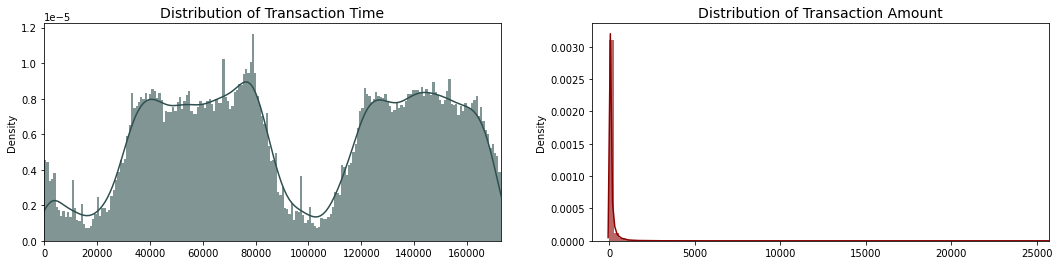

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# sns.distplot(time_val, ax=ax[0], bins=200, color='darkslategray') # deprecated and will be removed in seaborn v0.14.0
sns.histplot(time_val, ax=ax[0], bins=200, color='darkslategray', kde=True, stat="density",
              kde_kws=dict(cut=3), alpha=.6, edgecolor=(1, 1, 1, .4), linewidth=0)
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

# sns.distplot(amount_val, ax=ax[1], bins=85, color='darkred') # deprecated and will be removed in seaborn v0.14.0
sns.histplot(amount_val, ax=ax[1], bins=85, color='darkred', kde=True, stat="density",
              kde_kws=dict(cut=3), alpha=.6, edgecolor=(1, 1, 1, .4), linewidth=0)
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val - 1000), max(amount_val)])

plt.show()

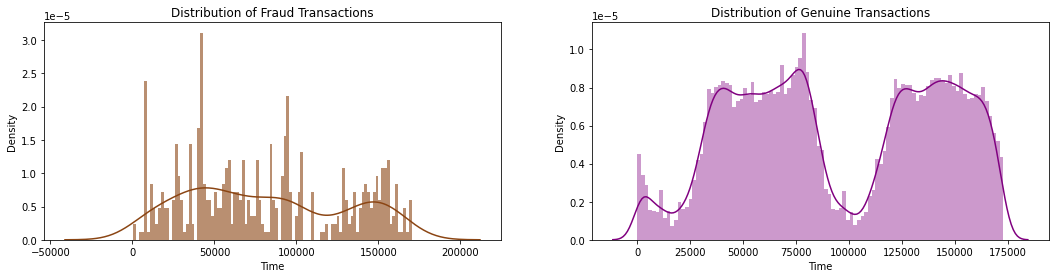

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(18,4))

# sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='saddlebrown', ax=axs[0])
sns.histplot(df[(df['Class'] == 1)]['Time'], bins=100, color='saddlebrown', ax=axs[0],kde=True,
    stat="density", kde_kws=dict(cut=3),     alpha=.6, edgecolor=(1, 1, 1, .4), linewidth=0)
axs[0].set_title("Distribution of Fraud Transactions")

# sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='purple', ax=axs[1])
sns.histplot(df[(df['Class'] == 0)]['Time'], bins=100, color='purple', ax=axs[1], kde=True,
    stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), linewidth=0)
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

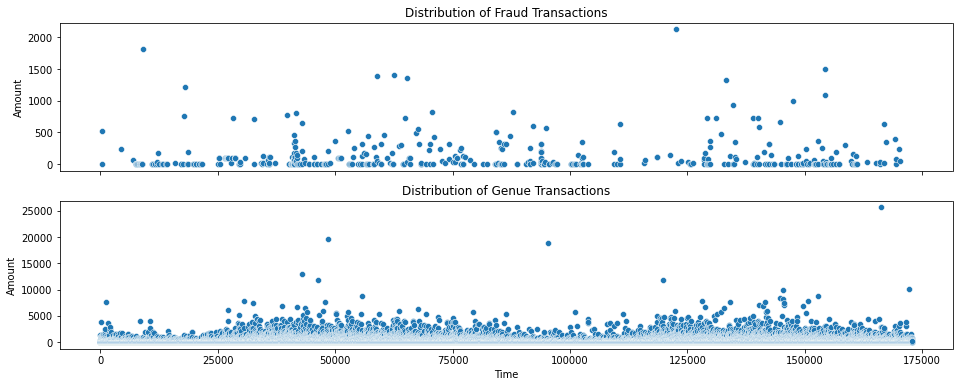

In [28]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

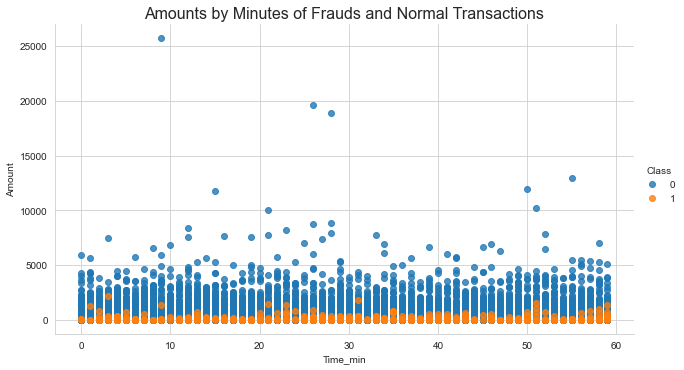

In [29]:
sns.set_style('whitegrid')
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

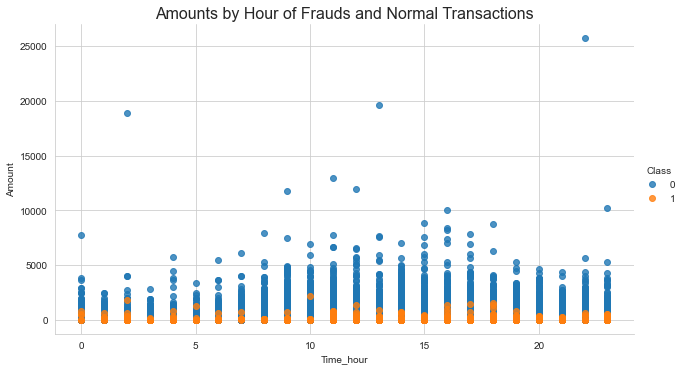

In [30]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()
df.drop(['Time_hour', 'Time_min'], axis=1, inplace=True)

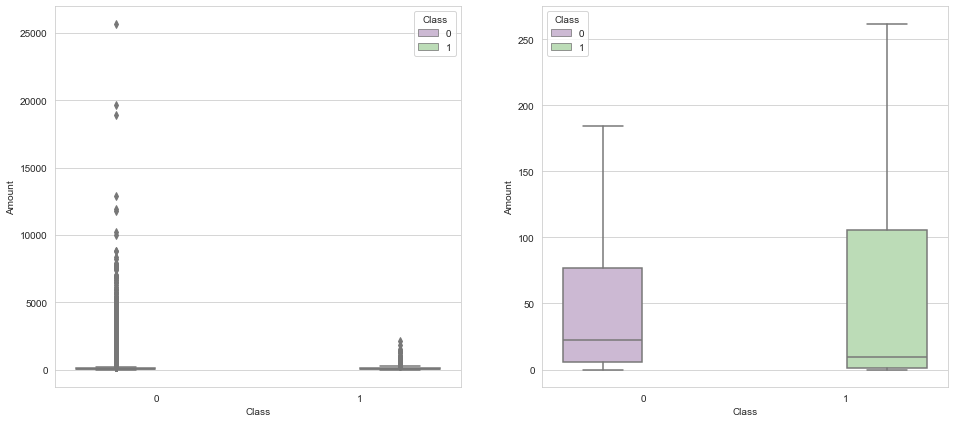

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,7))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [32]:
cols_names = df.drop(['Class', 'Amount', 'Time'], axis=1)
idx = 0

In [33]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

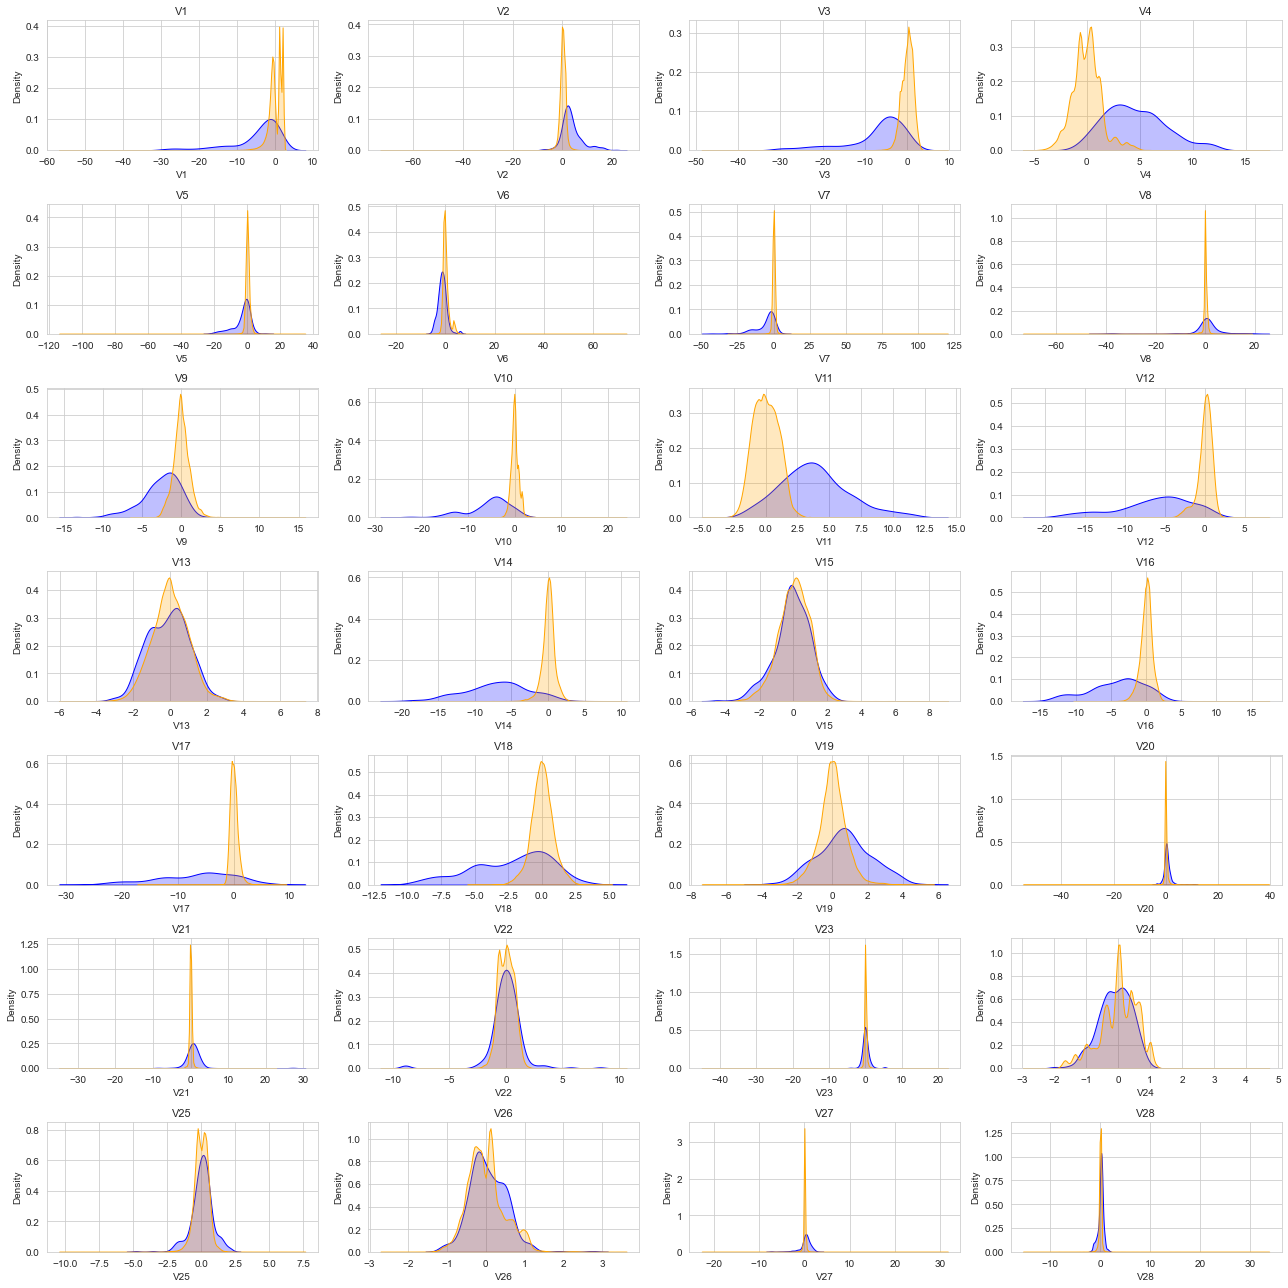

In [34]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(fraud[col], label="Normal", color='blue', shade=True)
    sns.kdeplot(normal[col], label="Fraud", color='orange', shade=True)
    plt.title(col, fontsize=11)
    plt.tight_layout()

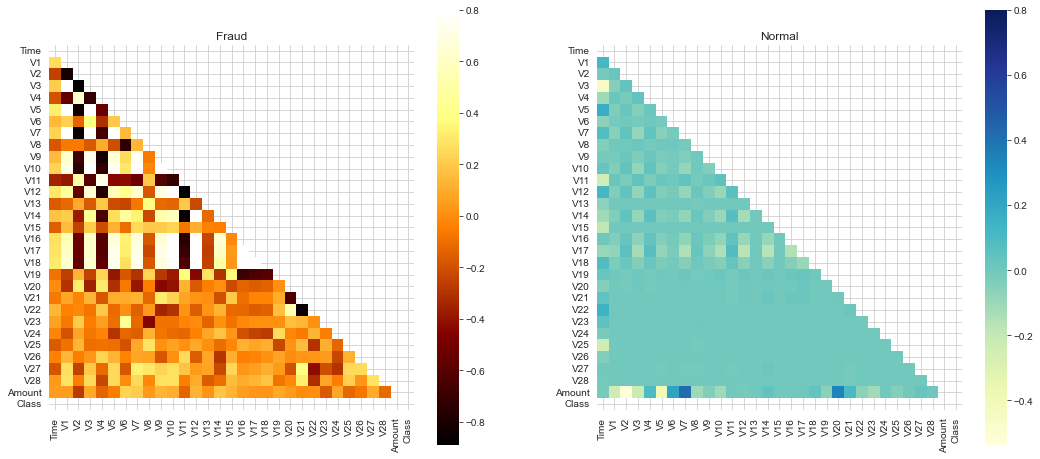

In [74]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

# Oversample the imblalanced dataset using Improved VAEGAN Framework (REF:https://ieeexplore.ieee.org/document/10210017)

In [ ]:
# Define feature columns and target variable

# feature_cols = ['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
#                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount']
# target_col = 'class'

# Preprocessing
y = df['Class'].values
X = df.drop('Class',axis=1).values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into fraud and non-fraud samples
fraud_indices = df['Class'][df['Class'] == 1].index
non_fraud_indices = df['Class'][df['Class'] == 0].index

fraud_data = X[fraud_indices]
non_fraud_data = X[non_fraud_indices]

In [ ]:
fraud_data

array([[-1.98803351, -1.180495  ,  1.18209005, ...,  0.6469882 ,
        -0.43406056, -0.35322939],
       [-1.98664368, -1.55386353, -1.91200646, ..., -0.62624682,
         0.10834929,  1.7617582 ],
       [-1.90262257, -1.17596291,  1.06536753, ...,  0.09802496,
        -0.46360746,  0.60603143],
       ...,
       [ 1.56959742, -0.34520105,  0.68210633, ...,  0.95410585,
         0.58882664, -0.04181846],
       [ 1.58254804, -1.58975021,  0.35478844, ...,  2.19228408,
        -0.76859627,  0.62630172],
       [ 1.59059217,  1.01699283,  0.09597005, ...,  0.00740175,
        -0.04637872, -0.18319079]])

In [ ]:
# Define the generator model architecture
# def build_generator(latent_dim):
#     print('Building Generator......')
#     input_noise = keras.layers.Input(shape=(latent_dim,))
#     x = keras.layers.Dense(128, activation='relu')(input_noise)
#     x =  keras.layers.Dense(256, activation='relu')(x)
#     output =  keras.layers.Dense(X.shape[1], activation='sigmoid')(x)
#     generator =  keras.Model(input_noise, output)
#     return generator

# Define the discriminator model architecture
def build_discriminator():
    print('Building Discriminator......')
    input_image =  keras.layers.Input(shape=(X.shape[1],))
    x =  keras.layers.Dense(256, activation='relu')(input_image)
    x =  keras.layers.Dense(128, activation='relu')(x)
    output =  keras.layers.Dense(1, activation='sigmoid')(x)
    discriminator =  keras.Model(input_image, output)
    return discriminator

# Define the encoder model architecture
def build_encoder(latent_dim):
    print('Building Encoder......')
    input_image =  keras.layers.Input(shape=(X.shape[1],))
    x =  keras.layers.Dense(128, activation='relu')(input_image)
    x =  keras.layers.Dense(64, activation='relu')(x)
    latent_mean =  keras.layers.Dense(latent_dim, name='latent_mean')(x)
    latent_log_var =  keras.layers.Dense(latent_dim, name='latent_log_var')(x)
    encoder =  keras.Model(input_image, [latent_mean, latent_log_var])
    return encoder

# Define the decoder model architecture
def build_decoder(latent_dim):
    print('Building Decoder......')
    latent_inputs =  keras.layers.Input(shape=(latent_dim,))
    x =  keras.layers.Dense(64, activation='relu')(latent_inputs)
    x =  keras.layers.Dense(128, activation='relu')(x)
    output =  keras.layers.Dense(X.shape[1], activation='sigmoid')(x)
    decoder =  keras.Model(latent_inputs, output)
    return decoder

# Define the VAE model architecture
def build_vae(encoder, decoder):
    print('Building VAE......')
    input_image =  keras.layers.Input(shape=(X.shape[1],))
    latent_mean, latent_log_var = encoder(input_image)
    latent_sampling =  keras.layers.Lambda(sampling)([latent_mean, latent_log_var])
    reconstructed_image = decoder(latent_sampling)
    vae =  keras.Model(input_image, reconstructed_image)
    return vae

# Define the sampling function for VAE
def sampling(args):
    latent_mean, latent_log_var = args
    epsilon = tf.random.normal(tf.shape(latent_mean))
    return latent_mean + tf.exp(0.5 * latent_log_var) * epsilon

# Define the loss functions for VAE
def vae_loss(input_image, reconstructed_image, latent_mean, latent_log_var):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(input_image, reconstructed_image))
    kl_loss = -0.5 * tf.reduce_mean(1 + latent_log_var - tf.square(latent_mean) - tf.exp(latent_log_var))
    return reconstruction_loss + kl_loss

# Define the combined VAEGAN model
def build_vaegan(generator, discriminator):
    print('Building VAEGAN......')
    discriminator.trainable = False
    input_noise =  keras.layers.Input(shape=(latent_dim,))
    generated_image = generator(input_noise)
    discriminator_output = discriminator(generated_image)
    vaegan =  keras.Model(input_noise, discriminator_output)
    return vaegan

# Define training loop for VAEGAN
def train_vaegan(vaegan, num_epochs, batch_size, latent_dim):
    print('Started training loop for VAEGAN......')
    for epoch in range(num_epochs):
        for _ in range(batch_size):
            # Train discriminator
            print(f'Training loop[ Epoch:{epoch},BatchNo:{_} ]for Descriminator......')
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator.predict(noise)
            real_images = fraud_data[np.random.choice(len(fraud_data), batch_size, replace=True)]
            with tf.GradientTape() as tape:
                discriminator_loss = 0.5 * (
                    tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(discriminator(real_images)), discriminator(real_images))) +
                    tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.zeros_like(discriminator(fake_images)), discriminator(fake_images)))
                )
            discriminator.trainable = True
            # discriminator_optimizer.minimize(discriminator_loss, discriminator.trainable_variables)
            discriminator_gradients = tape.gradient(discriminator_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

            # Train generator
            noise = tf.random.normal((batch_size, latent_dim))
            # generator_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(vaegan(noise)), vaegan(noise)))
            # vaegan_optimizer.minimize(generator_loss, generator.trainable_variables)
            with tf.GradientTape() as tape:
                generator_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(vaegan(noise)), vaegan(noise)))
            generator_gradients = tape.gradient(generator_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

        print(f'Epoch {epoch+1}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}')

# Define model parameters
latent_dim = 100
num_epochs = 100
batch_size = 128

# Build models
# generator = build_generator(latent_dim)
encoder = build_encoder(latent_dim)
print(encoder.summary())

decoder = build_decoder(latent_dim)
print(decoder.summary())

vae = build_vae(encoder=encoder, decoder=decoder)
print(vae.summary())

discriminator = build_discriminator()
print(discriminator.summary())

vaegan = build_vaegan(generator=vae, descriminator=discriminator)
print(vaegan.summary())

# Compile models and define optimizers
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# vaegan_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

vae.compile(optimizer='adam', loss=vae_loss)
vaegan.compile(optimizer='adam', loss='binary_crossentropy')

# Train VAEGAN model
train_vaegan(vaegan, num_epochs, batch_size, latent_dim)


4/4 [==============================] - 0s 2ms/step
Epoch 1, Discriminator Loss: 0.7115122079849243, Generator Loss: 0.3559553325176239
4/4 [==============================] - 0s 2ms/step
Epoch 2, Discriminator Loss: 0.7345237731933594, Generator Loss: 0.3480566143989563
4/4 [==============================] - 0s 2ms/step
Epoch 3, Discriminator Loss: 0.7320055365562439, Generator Loss: 0.3471065163612366
4/4 [==============================] - 0s 2ms/step
Epoch 4, Discriminator Loss: 0.7284445762634277, Generator Loss: 0.3467683792114258
4/4 [==============================] - 0s 2ms/step
Epoch 5, Discriminator Loss: 0.7458993792533875, Generator Loss: 0.34663140773773193
4/4 [==============================] - 0s 2ms/step
Epoch 6, Discriminator Loss: 0.7148959040641785, Generator Loss: 0.34653639793395996
4/4 [==============================] - 0s 2ms/step
Epoch 7, Discriminator Loss: 0.7315020561218262, Generator Loss: 0.34650254249572754
4/4 [==============================] - 0s 2ms/step
E

KeyboardInterrupt: 

: 

# Oversample minority classes

In [35]:
# Create two different dataframes of majority and minority class 
df_fraud = df[df.Class==1]
df_non_fraud = df[df.Class==0]

# Oversample the minority class
from sklearn.utils import resample
df_fraud_oversampled = resample(df_fraud, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_non_fraud) , # to match majority class with len(df_majority) rows
                                 random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_fraud_oversampled, df_non_fraud])

In [36]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 33276 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21   

# Model && Feature Selection

## Features Selection and Modifying

### Scale amount and time Features

In [10]:
rob_scaler = RobustScaler()

In [11]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

### Remove unwanted Features

In [12]:
# Remove unwanter Features:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

### Prepare Dependent, Independent and Target variables

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
target = ['Class']

### Prepare features columns

In [15]:
feat_cols = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']

### Split training and Testing variables

In [16]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [17]:
for train_index, test_index in sss.split(X, y):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

In [18]:
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [19]:
for train_idx, test_idx in sss2.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full.iloc[train_idx], X_train_full.iloc[test_idx]
    y_train, y_valid = y_train_full.iloc[train_idx], y_train_full.iloc[test_idx]

In [85]:
print('X_train_full shape: ', X_train_full.shape)
print('y_train_full shape: ', y_train_full.shape)
print('X_valid shape: ', X_valid.shape)
print('y_valid shape: ', y_valid.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train_full shape:  (227845, 30)
y_train_full shape:  (227845,)
X_valid shape:  (68354, 30)
y_valid shape:  (68354,)
X_train shape:  (159491, 30)
y_train shape:  (159491,)
X_test shape:  (56962, 30)
y_test shape:  (56962,)


# Model Training, Testing and Tuning

## Ensemble Models Without Oversampling Dataset

### Model 1: Gaussian Naive Bayes Classifier

In [86]:
Model1 = GaussianNB()
Model1.fit(X_train[feat_cols], y_train)
y_pred = Model1.predict(X_test[feat_cols])

In [87]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.81      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[55578  1286]
 [   19    79]]


In [88]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9770899898177733


### Model 2: Light Gradient Boosting Machine Classifier

In [ ]:


fit_params = {
             "eval_metric" : 'binary',
             "eval_set" : [(X_test[feat_cols].values, y_test)],
             'eval_names': ['valid'],
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],
              'min_child_weight': [1e-5],
              'subsample': sp_uniform(loc=0.2, scale=0.8),
              'max_depth': [-1],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.5),
              'reg_alpha': [ 10],
              'reg_lambda': [ 5]}

lgbmClassifierParams = {'boosting_type':'gbdt',
                        'random_state':42,
                        'verbose':1,
                        'metric':'auc',
                        'n_jobs':0,
                        'force_col_wise':True,
                        'learning_rate':0.03,
                        'max_depth':3,
                        'num_leaves':10,
                        'n_estimators':10,}
n_iter = 5

lgbm_clf = lgb.LGBMClassifier(**lgbmClassifierParams)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    n_iter=n_iter,
    scoring='accuracy',
    cv=5, n_jobs=-1,
    refit=True,
    random_state=42)

grid_search.fit(X_train[feat_cols].values, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

[LightGBM] [Info] Number of positive: 276, number of negative: 159215
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357610
[LightGBM] [Info] Start training from score -6.357610
Best score reached: 0.998269494987403 with params: {'colsample_bytree': 0.5872700594236813, 'learning_rate': 0.001, 'max_depth': -1, 'min_child_weight': 1e-05, 'n_estimators': 100, 'reg_alpha': 10, 'reg_lambda': 5, 'subsample': 0.960571445127933} 


LGBMClassifier(colsample_bytree=0.5872700594236813, force_col_wise=True,
               learning_rate=0.001, metric='auc', min_child_weight=1e-05,
               n_jobs=0, num_leaves=10, random_state=42, reg_alpha=10,
               reg_lambda=5, subsample=0.960571445127933, verbose=1)

In [53]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.6247240713084175, max_depth=8, metric='auc',
                              min_child_samples=206, min_child_weight=1, n_estimators=1000,force_col_wise=True,
                              n_jobs=4, num_leaves=44, random_state=42, reg_alpha=0.1,
                              reg_lambda=1, subsample=0.27997993265440235, verbose=-1)
# early stopping and verbosity
# it should be 0 or False, not -1/-100/etc
callbacks = [lgb.early_stopping(20, verbose=-1), lgb.log_evaluation(period=0)]
# fit
lgbm_clf.fit(X_train, y_train,eval_set=[(X_test,y_test)], callbacks=callbacks)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred.round()))

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.96012
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.80      0.47        98

    accuracy                           1.00     56962
   macro avg       0.66      0.90      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
lgb.plot_importance(lgbm_clf)

### Model 3: Random Forest Classifier

In [54]:

clf = RandomForestClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=4, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.65      0.75        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56856     8]
 [   34    64]]
accuracy is 0.9992626663389628


### Model 4: CatBoostClassifier

In [81]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,task_type='CPU')
Model.fit(X_train[feat_cols],y_train,eval_set=(X_test[feat_cols],y_test))

Learning rate set to 0.110914
0:	learn: 0.9990846	test: 0.9989291	best: 0.9989291 (0)	total: 131ms	remaining: 2m 10s
1:	learn: 0.9982883	test: 0.9982971	best: 0.9989291 (0)	total: 166ms	remaining: 1m 22s
2:	learn: 0.9985642	test: 0.9985429	best: 0.9989291 (0)	total: 200ms	remaining: 1m 6s
3:	learn: 0.9990219	test: 0.9987711	best: 0.9989291 (0)	total: 234ms	remaining: 58.1s
4:	learn: 0.9990595	test: 0.9988062	best: 0.9989291 (0)	total: 262ms	remaining: 52.2s
5:	learn: 0.9992100	test: 0.9989116	best: 0.9989291 (0)	total: 289ms	remaining: 47.9s
6:	learn: 0.9993291	test: 0.9990520	best: 0.9990520 (6)	total: 319ms	remaining: 45.2s
7:	learn: 0.9994420	test: 0.9991222	best: 0.9991222 (7)	total: 351ms	remaining: 43.5s
8:	learn: 0.9994608	test: 0.9992276	best: 0.9992276 (8)	total: 390ms	remaining: 42.9s
9:	learn: 0.9994984	test: 0.9992451	best: 0.9992451 (9)	total: 442ms	remaining: 43.8s
10:	learn: 0.9995486	test: 0.9992627	best: 0.9992627 (10)	total: 482ms	remaining: 43.3s
11:	learn: 0.9995548

In [82]:
y_pred=Model.predict(X_test[feat_cols])
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56860    22]
 [    4    76]]
accuracy is  0.9995435553526912


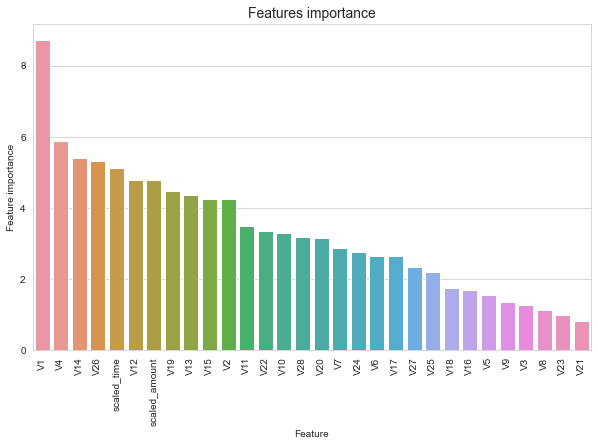

In [83]:
tmp = pd.DataFrame({'Feature': feat_cols, 'Feature importance': Model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Model 5: eXtreme GradientBoost

In [84]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic'],
    }

In [85]:
clf = xgb.XGBClassifier(random_state=42, tree_method='auto') #gpu_hist')

In [86]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [87]:
model.fit(X_train[feat_cols].values, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [88]:
y_pred=model.predict(X_test[feat_cols].values)

In [89]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.63      0.71        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    36]
 [   14    62]]
accuracy is  0.9991222218320986


## Ensemble Models With Oversampling Dataset

### Oversamplign with ADASYN

In [20]:
ads = ADASYN( n_neighbors=1, random_state=42)

In [21]:
X_ads, y_ads = ads.fit_resample(X_train_full[feat_cols].values, y_train_full)

In [22]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [23]:
for train_index, test_index in sss.split(X_ads, y_ads):
    X_train_ads, X_valid_ads = X_ads[train_index], X_ads[test_index]
    y_train_ads, y_valid_ads = y_ads[train_index], y_ads[test_index]

### Model 1: Gaussian Naive Bayes

In [94]:
Model = GaussianNB()

In [95]:
Model.fit(X_train_ads, y_train_ads)

GaussianNB()

In [96]:
y_pred = Model.predict(X_test[feat_cols])

In [97]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962

[[54077  2787]
 [    9    89]]
accuracy is 0.9509146448509532


### Model 2: eXtreme Gradient Boosting Classifier

In [98]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic']
    }

In [99]:
clf = xgb.XGBClassifier(random_state=42, tree_method='auto') # gpu_hist')

In [100]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [101]:
model.fit(X_train_ads, y_train_ads)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [102]:
y_pred=model.predict(X_test[feat_cols].values)

In [103]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.94      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.93      0.96     56962

[[52844     6]
 [ 4020    92]]
accuracy is  0.9293213019205786


### Model 3: Random Forest Classifier

In [104]:
clf = RandomForestClassifier(max_depth=3, min_samples_split=4,min_samples_leaf=4, random_state=42)

In [105]:
clf.fit(X_train_ads, y_train_ads)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [106]:
y_pred = clf.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.00      0.05      0.00        98

    accuracy                           0.95     56962
   macro avg       0.50      0.50      0.49     56962
weighted avg       1.00      0.95      0.97     56962

[[54249  2615]
 [   93     5]]
accuracy is 0.9524595344264597


### Model 4: Light Gradient Boosting Machine Classifier

In [108]:
fit_params = {"early_stopping_rounds" : 50,
             "eval_metric" : 'binary',
             "eval_set" : [(X_valid[feat_cols].values, y_valid)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

In [109]:
param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],

              'min_child_weight': [1e-5],

              'max_depth': [ 3],

              'reg_alpha': [0],
              'reg_lambda': [0]}

In [110]:
n_iter = 4

In [111]:
lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None')

In [112]:
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    scoring='accuracy',
    cv=4, n_jobs=-1)

In [113]:
grid_search.fit(X_train_ads, y_train_ads, **fit_params)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 181947, number of negative: 181961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 363908, number of used features: 30
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499981 -> initscore=-0.000077
[LightGBM] [Info] Start training from score -0.000077


RandomizedSearchCV(cv=4,
                   estimator=LGBMClassifier(metric='None', random_state=42,
                                            silent=True),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001],
                                        'max_depth': [3],
                                        'min_child_weight': [1e-05],
                                        'n_estimators': [100], 'reg_alpha': [0],
                                        'reg_lambda': [0]},
                   scoring='accuracy')

In [114]:
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

Best score reached: 0.8779004583576069 with params: {'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1e-05, 'max_depth': 3, 'learning_rate': 0.001} 


In [115]:
opt_parameters =  grid_search.best_params_

In [116]:
clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())

In [117]:
clf_sw.set_params(**opt_parameters)

LGBMClassifier(learning_rate=0.001, max_depth=3, metric='None',
               min_child_weight=1e-05, random_state=42, reg_alpha=0,
               reg_lambda=0, silent=True)

In [118]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [119]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 276, number of negative: 159215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357610
[LightGBM] [Info] Start training from score -6.357610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [120]:
y_pred = lgbm_clf.predict(X_test)

In [121]:
y_score = lgbm_clf.predict_proba(X_test)[:,1]

In [122]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Model 5: CatBoost Classifier

In [123]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42, task_type='CPU')

In [124]:
Model.fit(X_train_ads,y_train_ads,eval_set=(X_valid_ads,y_valid_ads))

Learning rate set to 0.13598
0:	learn: 0.8793541	test: 0.8783978	best: 0.8783978 (0)	total: 91.2ms	remaining: 1m 31s
1:	learn: 0.9217330	test: 0.9199578	best: 0.9199578 (1)	total: 161ms	remaining: 1m 20s
2:	learn: 0.9339119	test: 0.9325214	best: 0.9325214 (2)	total: 243ms	remaining: 1m 20s
3:	learn: 0.9408779	test: 0.9397430	best: 0.9397430 (3)	total: 318ms	remaining: 1m 19s
4:	learn: 0.9486161	test: 0.9473493	best: 0.9473493 (4)	total: 410ms	remaining: 1m 21s
5:	learn: 0.9549666	test: 0.9540213	best: 0.9540213 (5)	total: 518ms	remaining: 1m 25s
6:	learn: 0.9630511	test: 0.9628697	best: 0.9628697 (6)	total: 625ms	remaining: 1m 28s
7:	learn: 0.9659172	test: 0.9655847	best: 0.9655847 (7)	total: 711ms	remaining: 1m 28s
8:	learn: 0.9694566	test: 0.9690691	best: 0.9690691 (8)	total: 808ms	remaining: 1m 28s
9:	learn: 0.9738533	test: 0.9735867	best: 0.9735867 (9)	total: 933ms	remaining: 1m 32s
10:	learn: 0.9773707	test: 0.9771920	best: 0.9771920 (10)	total: 1.03s	remaining: 1m 32s
11:	learn: 

In [125]:
y_pred=Model.predict(X_test[feat_cols].values)

In [126]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56829    17]
 [   35    81]]
accuracy is  0.9990871107053826


## Training and Testing Deep Learning Models

In [24]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_valid_d = np.expand_dims(X_valid, -1)
y_valid_d = np.expand_dims(y_valid, -1)
y_train_d = np.expand_dims(y_train, -1)

### Deep Convolutional Network

In [25]:
model = Sequential()
model.add(Conv1D(32, 2, activation='selu', kernel_initializer="lecun_normal", input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='selu', kernel_initializer="lecun_normal"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

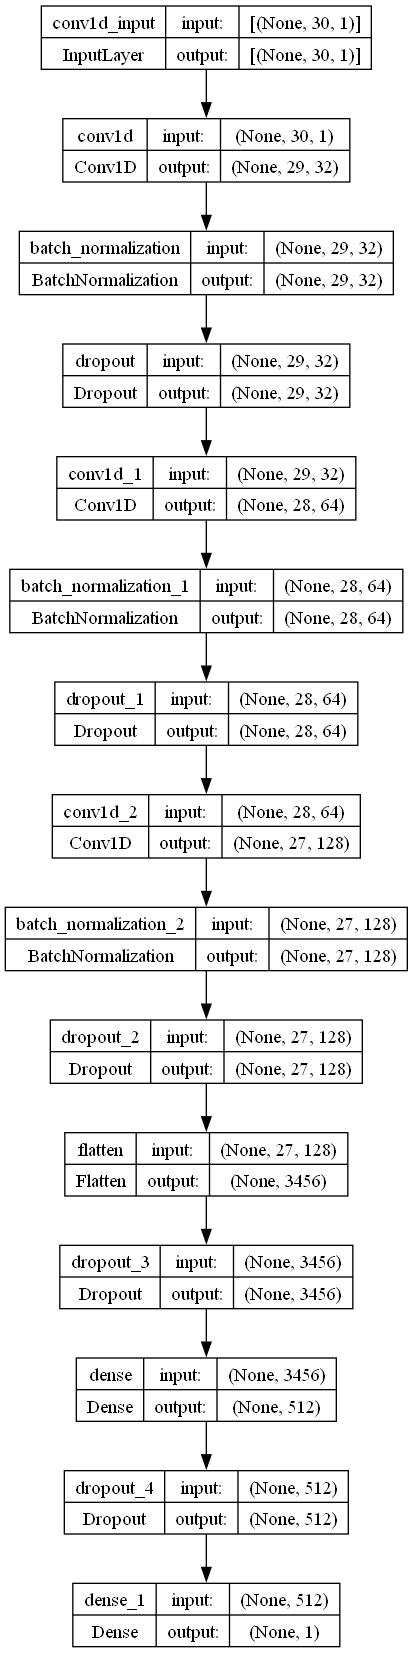

In [28]:
# Visualize Model 
plot_model(model, to_file='model_diagram/deep_conv.png', show_shapes=True, show_layer_names=True,)

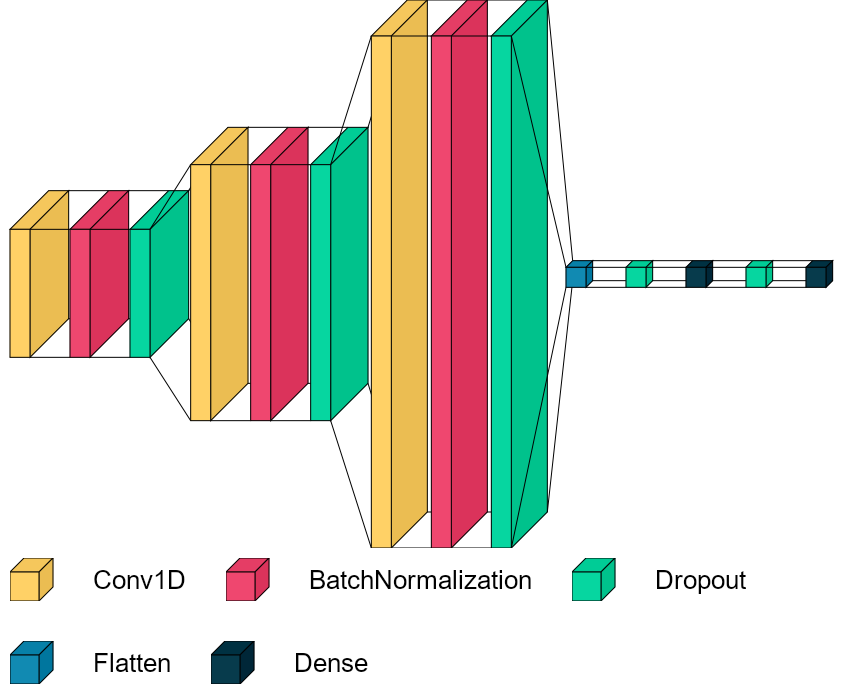

In [29]:
font = ImageFont.truetype("arial.ttf", 26)
visualkeras.layered_view(model,to_file="model_diagram/deep_conv_layers.png",legend=True,spacing=40,font=font)

In [33]:
optimizer = keras.optimizers.legacy.Nadam(lr=0.003, beta_1=0.9, beta_2=0.999)

In [34]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [39]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [49]:
m = model.fit(X_train_d, y_train,
              validation_data=(X_valid_d, y_valid_d),
              batch_size=500,
              epochs=30,
              callbacks=[callback]
             )

Epoch 1/20
319/319 [==============================] - 79s 246ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 2/20
 93/319 [=======>......................] - ETA: 50s - loss: 0.0042 - accuracy: 0.9991

KeyboardInterrupt: 

In [42]:
score = model.evaluate(X_test_d, y_test)
print(score)

   1/1781 [..............................] - ETA: 1:34 - loss: 4.2584e-10 - accuracy: 1.0000

1781/1781 [==============================] - 13s 7ms/step - loss: 0.0123 - accuracy: 0.9992
[0.012293491512537003, 0.9991748929023743]


In [43]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [44]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [45]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)


Precision: 0.000000

Recall: 0.000000


In [46]:
f1 = f1_score(y_test, yhat_probs)
print('\nF1 score: %f' % f1)


F1 score: 0.000000


In [47]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

_______________________________________________

Accuracy: 0.998280


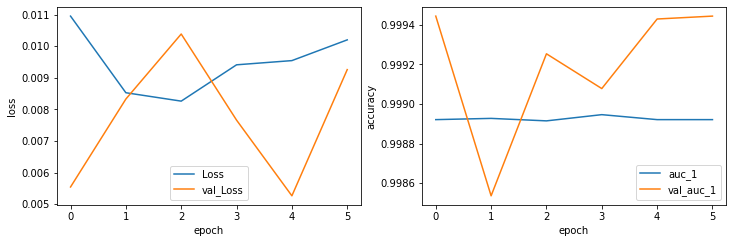

In [48]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()

In [140]:
X_train_d.shape

(159491, 30, 1)

In [39]:
def create_lstm_model():
    model = Sequential()
    # model.add(LSTM(20, input_shape=(X_train_d[0].shape), kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=l1(0.1), recurrent_regularizer=l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
    model.add(Bidirectional(LSTM(20, kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=l1(0.1), recurrent_regularizer=l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2), input_shape=(X_train_d[0].shape)))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    return model

In [ ]:
# Bidirectional LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_d[0].shape)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))

In [40]:
model = create_lstm_model()

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 40)               3520      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


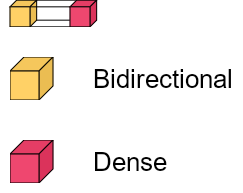

In [42]:
font = ImageFont.truetype("arial.ttf", 26)
visualkeras.layered_view(model,legend=True,spacing=40,font=font)

In [210]:
# ACGBAdam Optimizer (An Improved Adam Optimization Algorithm Combining Adaptive Coefficients and Composite Gradients Based on Randomized Block Coordinate Descent)
# REf: https://www.hindawi.com/journals/cin/2023/4765891/alg3/
class ACGBAdam(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, decay=0.0, name="ACGBAdam"):
        super(ACGBAdam, self).__init__(
            name = name
        )
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.decay = decay
        self.name = name

    def get_config(self):
        config = super(ACGBAdam, self).get_config()
        config.update({
            "learning_rate": self.learning_rate,
            "beta1": self.beta1,
            "beta2": self.beta2,
            "epsilon": self.epsilon,
            "decay": self.decay,
        })
        return config

    def resource_apply_gradients(self, grads_and_vars, global_step=None):
        grads, vars = zip(*grads_and_vars)
        m = tf.Variable(tf.zeros([v.shape[0]], dtype=v.dtype), trainable=False)
        v = tf.Variable(tf.zeros([v.shape[0]], dtype=v.dtype), trainable=False)
        m_t = tf.multiply(self.beta1, m) + tf.multiply(1.0 - self.beta1, grads)
        v_t = tf.multiply(self.beta2, v) + tf.multiply(1.0 - self.beta2, tf.square(grads))
        g_t = m_t / (tf.sqrt(v_t) + self.epsilon)
        var_update = tf.subtract(vars, tf.multiply(self.learning_rate, g_t))
        return tf.group([m.assign(m_t), v.assign(v_t), var_update])

In [43]:
# optimizer = ACGBAdam(learning_rate=0.001)
optimizer = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)

In [46]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy", tf.keras.metrics.AUC(curve='PR', name='auc_pr')])

In [47]:
m = model.fit(X_train_d, y_train,
              validation_data=(X_valid_d, y_valid_d),
              batch_size=64,
              epochs=30,
             )

Epoch 1/30


2493/2493 [==============================] - 120s 43ms/step - loss: 12.4940 - accuracy: 0.9441 - auc_pr: 0.0014 - val_loss: 9.9757 - val_accuracy: 0.9983 - val_auc_pr: 0.0014
Epoch 2/30
2493/2493 [==============================] - 100s 40ms/step - loss: 8.3072 - accuracy: 0.9983 - auc_pr: 0.0123 - val_loss: 6.7256 - val_accuracy: 0.9983 - val_auc_pr: 0.2485
Epoch 3/30
2493/2493 [==============================] - 99s 40ms/step - loss: 5.4373 - accuracy: 0.9983 - auc_pr: 0.0120 - val_loss: 4.2548 - val_accuracy: 0.9983 - val_auc_pr: 0.1718
Epoch 4/30
2493/2493 [==============================] - 99s 40ms/step - loss: 3.2825 - accuracy: 0.9983 - auc_pr: 0.0103 - val_loss: 2.4020 - val_accuracy: 0.9983 - val_auc_pr: 0.0841
Epoch 5/30
2493/2493 [==============================] - 99s 40ms/step - loss: 1.7081 - accuracy: 0.9983 - auc_pr: 0.0078 - val_loss: 1.1198 - val_accuracy: 0.9983 - val_auc_pr: 0.1221
Epoch 6/30
2493/2493 [==============================] - 105s 42ms/step - loss: 0.6826 - 

In [48]:
score = model.evaluate(X_test_d, y_test)
print(score)

1781/1781 [==============================] - 12s 7ms/step - loss: 0.0131 - accuracy: 0.9983 - auc_pr: 0.0017
[0.013097722083330154, 0.9982795715332031, 0.001720445230603218]


In [49]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [50]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [51]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)


Precision: 0.000000

Recall: 0.000000


In [52]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

_______________________________________________

Accuracy: 0.998280


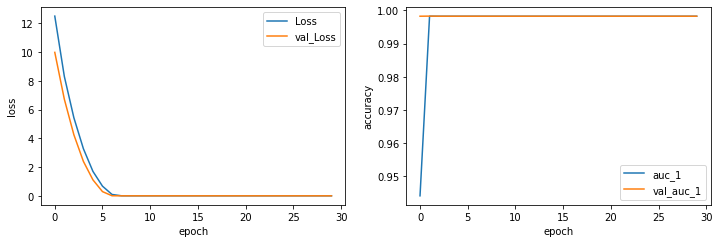

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()

1781/1781 [==============================] - 14s 8ms/step


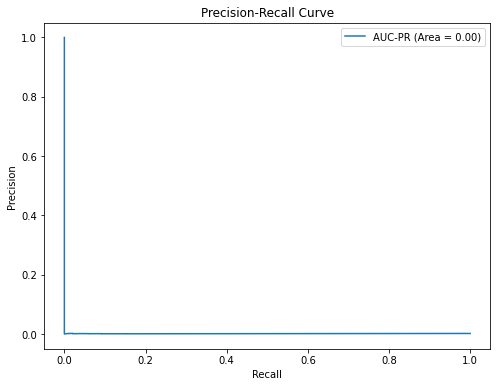

In [55]:
# Predict probabilities for the test data.
y_probs = model.predict(X_test_d)

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate AUC-PR
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR (Area = {auc_score:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()